In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("laptops.csv")

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [6]:
keep = ['ram', 'storage', 'screen', 'final_price']

<Axes: >

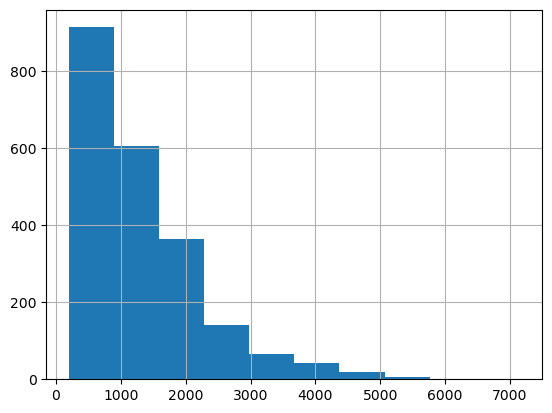

In [8]:
df['final_price'].hist()

In [9]:
df_keep = df[keep]

#### Question 1 - There's one column with missing values. What is it?


In [12]:
df_keep.isna().sum()
#screen is the column with missing values

ram            0
storage        0
screen         4
final_price    0
dtype: int64

#### Question 2 - What's the median (50% percentile) for variable 'ram'?

In [16]:
df_keep.ram.median()

16.0

#### Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 4<br>.
Split your data in train/val/test sets, with 60%/20%/20% din.n.

In [18]:
n = len(df_keep)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+n_test)

n_val, n_test, n_train

(432, 432, 1296)

In [27]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [45]:
df_train = df_keep.iloc[idx[:n_train]]
df_val = df_keep.iloc[idx[n_train:n_train+n_val]]
df_test = df_keep.iloc[idx[n_train+n_val:]]

In [46]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [47]:
y_train = df_train['final_price']
y_val = df_val['final_price']
y_test = df_test['final_price']

In [48]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [49]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

#### Filling NAs with 0 and training

In [52]:
X_train_0 = df_train.fillna(0)

In [65]:
w0, w = train_linear_regression(X_train_0, y_train)
w0, w

(676.8954853003471, array([ 43.70681555,   0.86506867, -36.10399833]))

In [66]:
y_pred = w0 + df_val.dot(w)

In [67]:
y_pred

0      2362.918277
1      1255.897318
2      1081.070056
3       756.993211
4       906.242794
          ...     
427     667.926821
428     767.824411
429     964.009191
430    1313.663715
431     401.631166
Length: 432, dtype: float64

In [68]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [69]:
rmse(y_pred, y_val)

596.9643847703726

#### Filling NAs with mean and training

In [57]:
mean = df_train.screen.mean()

X_train_mean = df_train.fillna(mean)

In [70]:
w0, w = train_linear_regression(X_train_mean, y_train)
w0, w

(808.9159907333383, array([ 43.90774584,   0.87135236, -45.18273312]))

In [71]:
y_pred = w0 + df_val.dot(w)

In [72]:
rmse(y_pred, y_val)

597.7070669180578

In [73]:
#Marginally better RMSE with fillna(0) compared to fillna(mean)

#### Question 4

In [81]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [82]:
X_train_0 = df_train.fillna(0)

In [83]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 676.8954853003471 596.9643847703726
1e-05 676.8948629251016 596.9643810097239
0.0001 676.8892615992215 596.9643471643457
0.001 676.8332534432681 596.9640087563886
0.1 670.7284836313021 596.9272864329818
1 619.9030834107807 596.6341330896954
10 352.79713367676436 595.4634999003733


#### Question 5

In [ ]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#linear regression without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [88]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list_of_rmse=[]
for i in seed:
    np.random.seed(i)
    idx = np.arange(n)
    np.random.shuffle(idx)

    #split based on index
    df_train = df_keep.iloc[idx[:n_train]]
    df_val = df_keep.iloc[idx[n_train:n_train+n_val]]
    df_test = df_keep.iloc[idx[n_train+n_val:]]
    
    #reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    #gettign target variable out
    y_train = df_train['final_price']
    y_val = df_val['final_price']
    y_test = df_test['final_price']

    #removing target variable from feature matrix
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train_0 = df_train.fillna(0)
    w0, w = train_linear_regression(X_train_0, y_train)
    y_pred = w0 + df_val.dot(w)

    def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)
    
    list_of_rmse.append(rmse(y_pred, y_val))
    
    print(i, rmse(y_pred, y_val))
    print()

0 565.9748040791599

1 636.3404675641771

2 588.955869790796

3 597.7436621646907

4 571.962791511103

5 573.238325661895

6 647.2469694217853

7 548.9372396061776

8 587.3335036169963

9 576.491366038104



In [95]:
round(np.std(list_of_rmse),3)

29.226

#### Question 6 - 

In [ ]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

#split based on index
df_train = df_keep.iloc[idx[:n_train]]
df_val = df_keep.iloc[idx[n_train:n_train+n_val]]
df_test = df_keep.iloc[idx[n_train+n_val:]]

#reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#gettign target variable out
y_train = df_train['final_price']
y_val = df_val['final_price']
y_test = df_test['final_price']

#removing target variable from feature matrix
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [96]:
X_full_train = pd.concat([df_train, df_val])
X_full_train = X_full_train.fillna(0)

y_full_train = np.concatenate([y_train, y_val])

In [97]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [99]:
w0, w = train_linear_regression_reg(X_full_train,y_full_train)

In [100]:
y_pred = w0 + df_test.dot(w)
rmse(y_pred, y_test)

608.3000367227687